In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
# mount google drive
# prefix = '/content/drive'
# from google.colab import drive
# drive.mount(prefix, force_remount=True)

# Read CSV and data overview

## How to get the data
1. Downloaded Dataset from https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore?location=38.572038%2C-93.984496%2C6.00 
2. Unzipped the downloaded dataset locally on your computer.
3. Upload the `Alternative_Fueling_Stations.csv` file to Colab notebook.

In [ ]:
# read csv file
file_path = '/content/Alternative_Fueling_Stations.csv'
afs_df = pd.read_csv(file_path,low_memory=False)
afs_df.shape

(70339, 75)

In [ ]:
afs_df.describe()

,X,Y,OBJECTID,id,restricted_access,plus4,cng_dispenser_num,cng_total_compression,cng_total_storage,e85_blender_pump,...,lpg_primary,rd_blends_fr,rd_max_biodiesel_level,access_days_time_fr,intersection_directions_fr,bd_blends_fr,ev_pricing_fr,federal_agency_id,longitude,latitude
count,7.033900e+04,7.033900e+04,70339.000000,70339.000000,18619.000000,0.0,939.000000,635.000000,311.000000,4457.000000,...,2648.000000,0.0,539.000000,0.0,0.0,0.0,0.0,1352.000000,70339.000000,70339.000000
mean,-1.079417e+07,4.576258e+06,35170.000000,159643.079614,0.061281,NaN,2.525027,901.540157,48692.411576,0.333632,...,0.507175,NaN,5.166976,NaN,NaN,NaN,NaN,13.525148,-96.965647,37.806795
std,2.123297e+06,7.124584e+05,20305.264629,62779.858020,0.239852,NaN,5.007687,996.412521,56752.339675,0.471563,...,0.500043,NaN,1.575234,NaN,NaN,NaN,NaN,6.134512,19.073902,5.074610
min,-1.835089e+07,0.000000e+00,1.000000,17.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,...,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN,2.000000,-164.848855,0.000000
25%,-1.312275e+07,4.035025e+06,17585.500000,114822.500000,0.000000,NaN,1.000000,250.000000,30000.000000,0.000000,...,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN,8.000000,-117.883644,34.046330
50%,-1.040454e+07,4.637018e+06,35170.000000,174582.000000,0.000000,NaN,2.000000,700.000000,36000.000000,0.000000,...,1.000000,NaN,5.000000,NaN,NaN,NaN,NaN,14.000000,-93.465610,38.406548
75%,-8.929248e+06,5.097751e+06,52754.500000,205060.500000,0.000000,NaN,2.000000,1200.000000,58554.000000,1.000000,...,1.000000,NaN,5.000000,NaN,NaN,NaN,NaN,16.000000,-80.212798,41.576499
max,8.527306e+06,9.569617e+06,70339.000000,256431.000000,1.000000,NaN,80.000000,8250.000000,593136.000000,1.000000,...,1.000000,NaN,20.000000,NaN,NaN,NaN,NaN,29.000000,76.602094,64.852466


In [ ]:
afs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70339 entries, 0 to 70338
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           70339 non-null  float64
 1   Y                           70339 non-null  float64
 2   OBJECTID                    70339 non-null  int64  
 3   access_code                 70338 non-null  object 
 4   access_days_time            58354 non-null  object 
 5   access_detail_code          7604 non-null   object 
 6   cards_accepted              12352 non-null  object 
 7   date_last_confirmed         70234 non-null  object 
 8   expected_date               4534 non-null   object 
 9   fuel_type_code              70339 non-null  object 
 10  groups_with_access_code     70339 non-null  object 
 11  id                          70339 non-null  int64  
 12  open_date                   70121 non-null  object 
 13  owner_type_code             279

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Text(0, 0.5, 'Total stations count')

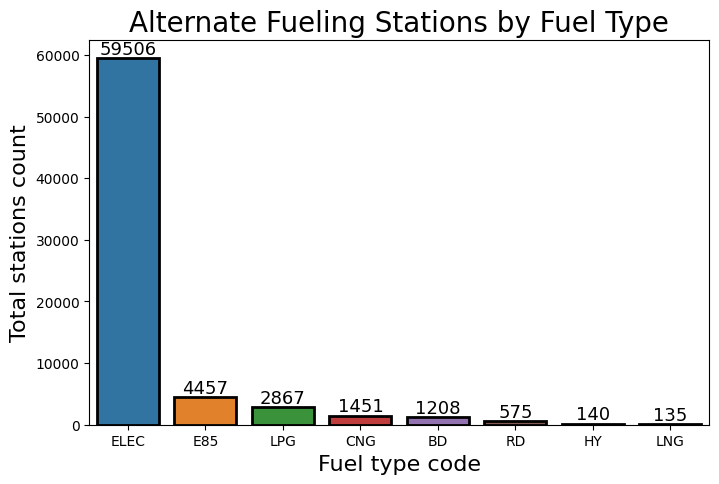

In [ ]:
afs_by_type_df=afs_df[['id','fuel_type_code']].groupby(['fuel_type_code'], as_index=False).agg(num_stations=('id','count'))
afs_by_type_df=afs_by_type_df.sort_values(by=['num_stations'],ascending=False)
plt.figure(figsize=(8,5))
g=sns.barplot(x="fuel_type_code",y="num_stations",data=afs_by_type_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, color='black')
g.set_title('Alternate Fueling Stations by Fuel Type',size=20)
g.set_xlabel('Fuel type code',size=16)
g.set_ylabel('Total stations count',size=16)
# g.legend(loc='upper right')

Text(0, 0.5, 'Stations number')

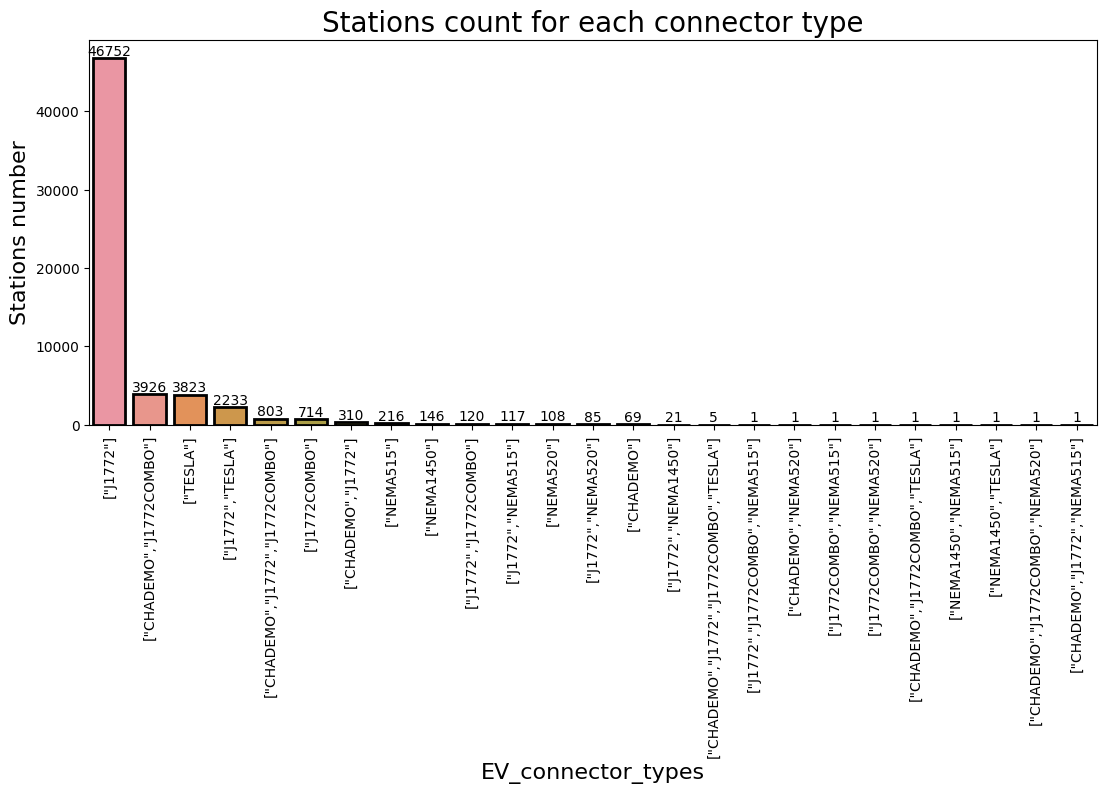

In [ ]:
afs_by_type_df=afs_df[afs_df['fuel_type_code']=='ELEC'][['id','ev_connector_types']].groupby(['ev_connector_types'], as_index=False).agg(num_stations=('id','count'))
afs_by_type_df=afs_by_type_df.sort_values(by=['num_stations'],ascending=False)
plt.figure(figsize=(13,5))
g=sns.barplot(x="ev_connector_types",y="num_stations",data=afs_by_type_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

g.set_title('Stations count for each connector type',size=20)
g.set_xlabel('EV_connector_types',size=16)
g.set_ylabel('Stations number',size=16)
# g.legend(loc='upper right')

Text(0, 0.5, 'Station count')

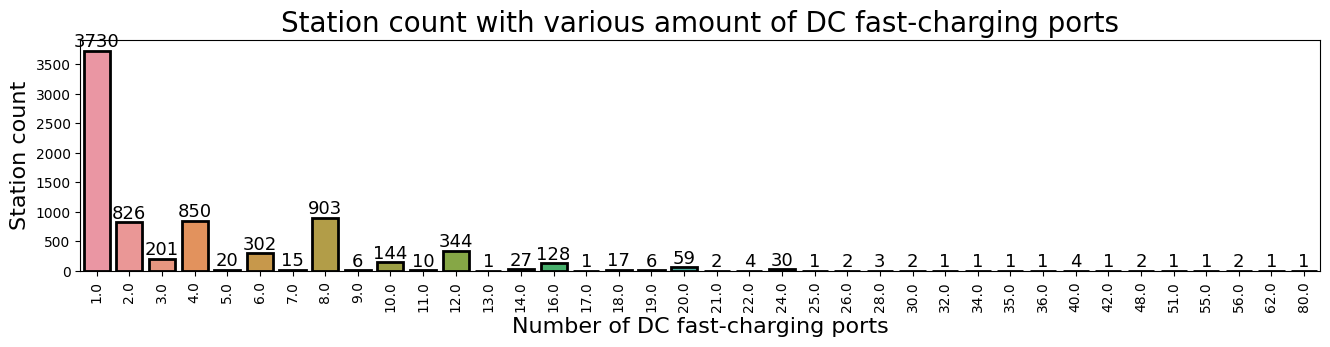

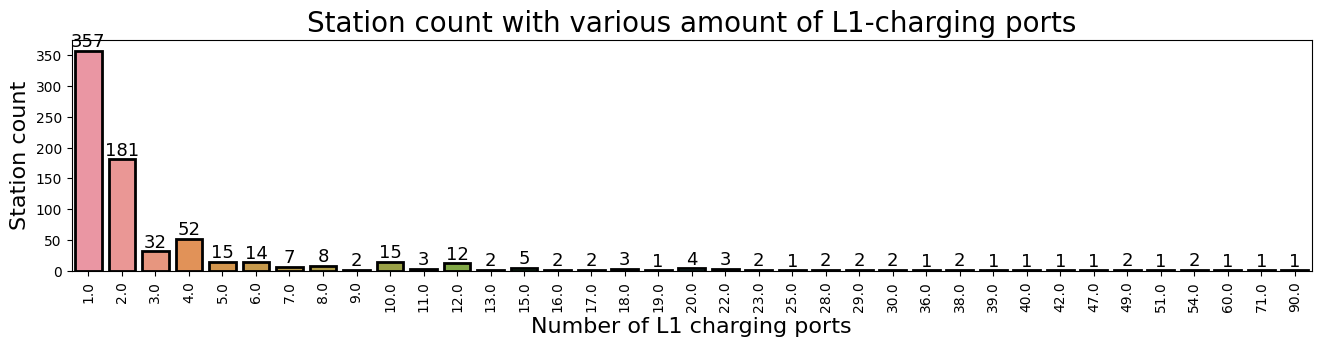

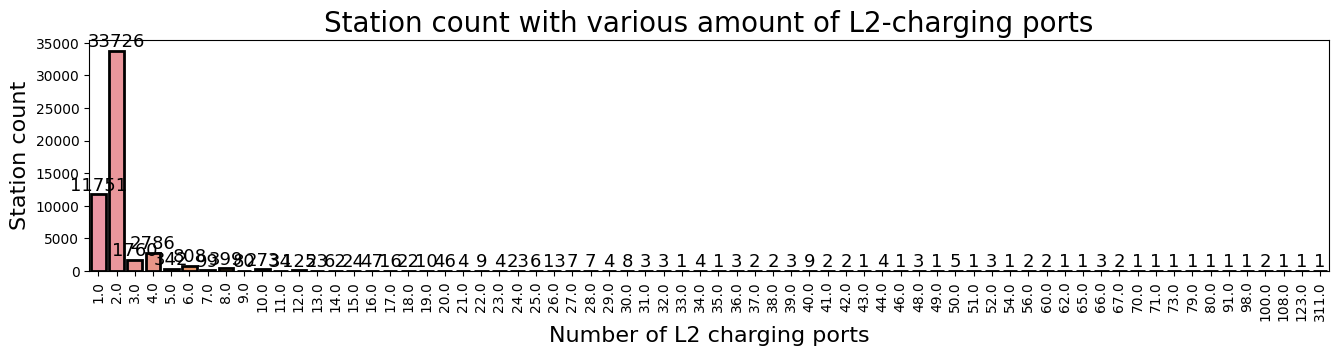

In [ ]:
######
# DC
######
afs_by_type_df=afs_df[afs_df['fuel_type_code']=='ELEC'][['id','ev_dc_fast_num']].groupby(['ev_dc_fast_num'], as_index=False).agg(num_stations=('id','count'))
afs_by_type_df=afs_by_type_df.sort_values(by=['num_stations'],ascending=False)
plt.figure(figsize=(16,3))
g=sns.barplot(x="ev_dc_fast_num",y="num_stations",data=afs_by_type_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, color='black')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

g.set_title('Station count with various amount of DC fast-charging ports',size=20)
g.set_xlabel('Number of DC fast-charging ports',size=16)
g.set_ylabel('Station count',size=16)
######
# L1
######
afs_by_type_df=afs_df[afs_df['fuel_type_code']=='ELEC'][['id','ev_level1_evse_num']].groupby(['ev_level1_evse_num'], as_index=False).agg(num_stations=('id','count'))
afs_by_type_df=afs_by_type_df.sort_values(by=['num_stations'],ascending=False)
plt.figure(figsize=(16,3))
g=sns.barplot(x="ev_level1_evse_num",y="num_stations",data=afs_by_type_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, color='black')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

g.set_title('Station count with various amount of L1-charging ports',size=20)
g.set_xlabel('Number of L1 charging ports',size=16)
g.set_ylabel('Station count',size=16)

######
# L2
######
afs_by_type_df=afs_df[afs_df['fuel_type_code']=='ELEC'][['id','ev_level2_evse_num']].groupby(['ev_level2_evse_num'], as_index=False).agg(num_stations=('id','count'))
afs_by_type_df=afs_by_type_df.sort_values(by=['num_stations'],ascending=False)
plt.figure(figsize=(16,3))
g=sns.barplot(x="ev_level2_evse_num",y="num_stations",data=afs_by_type_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, color='black')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

g.set_title('Station count with various amount of L2-charging ports',size=20)
g.set_xlabel('Number of L2 charging ports',size=16)
g.set_ylabel('Station count',size=16)
# g.legend(loc='upper right')

In [ ]:
# Total count of EV charging stations in each state
by_state_afs_df = afs_df[afs_df['fuel_type_code']=='ELEC'][['id','state']].groupby(['state'], as_index=False).agg(num_stations=('id','count'))
by_state_afs_df = by_state_afs_df.sort_values(by=['num_stations'],ascending=False)

fig = go.Figure(data=go.Choropleth(
    locations=by_state_afs_df.state, # Spatial coordinates
    z = by_state_afs_df.num_stations, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'hot',
    colorbar_title = "Number of charging stations"
))

fig.update_layout(
    title_text = 'Number of charging stations by State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

# Pre-processing

## Fill na

In [ ]:
# There is one NA value in access_code, the value of ev_network is non-networked 
# print(afs_df['access_code'].count())
print(afs_df[afs_df['access_code'].isna()]['ev_network'])
print(afs_df[afs_df['access_code'].isna()]['access_code'])

# Fill 1 NA value in access_code
afs_df['access_code'].fillna(value='private',inplace=True)
# Fill 1 NA value in station_name
afs_df['station_name'].fillna(value='Unknown',inplace=True)

65677    Non-Networked
Name: ev_network, dtype: object
65677    NaN
Name: access_code, dtype: object


## Drop na

In [ ]:
afs_df[afs_df.state.isna()]

,X,Y,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
63569,-1.835089e+07,1.450808e+06,63570,public,24 hours daily,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""1677""]","[""55927""]",-164.848855,12.921876
69596,3.561223e+06,2.817791e+06,69597,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""3026""]","[""24431"",""24432"",""24468"",""24512"",""24515"",""24760""]",31.991007,24.527271
69599,1.113195e+05,1.113251e+05,69600,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""1a3b06a5-35cc-45d7-858c-f078da6bad51""]","[""ef000e86-8b77-4abe-8065-4a109db27cb1""]",1.000000,1.000000
69608,1.113195e+05,1.113251e+05,69609,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""465ba1dd-d734-8158-93cc-330000755039""]","[""465ba1dd-d734-8158-93cc-330000691113"",""465ba...",1.000000,1.000000
69770,-1.113195e+05,1.113251e+05,69771,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""465ba1dd-d734-8158-93cc-330000687086""]","[""05856920-a3f8-4be6-827a-94d1fd17ccb9""]",-1.000000,1.000000
69832,0.000000e+00,0.000000e+00,69833,public,NaN,NaN,NaN,2023/03/16 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""e6ac2e47-5701-48a5-b432-9c9ec6cde319""]","[""465ba1dd-d734-8158-93cc-330000776920"",""465ba...",0.000000,0.000000
69945,-1.113195e+05,1.113251e+05,69946,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""465ba1dd-d734-8158-93cc-330000687063""]","[""ed96490d-d3b5-4ed6-9483-467e108a2fab""]",-1.000000,1.000000
70173,1.113195e+05,1.113251e+05,70174,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""bbc00e66-dba9-48c1-a58e-1c07f41c304c""]","[""48803f4d-ca2c-41d3-9fd7-1f022f4cb831""]",1.000000,1.000000
70298,1.113195e+05,1.113251e+05,70299,public,NaN,NaN,NaN,2023/03/15 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""e9953941-92b5-4801-be84-332c023c1119""]","[""01385683-3491-4716-97d7-924e246c1c06"",""1dbd1...",1.000000,1.000000


In [ ]:
# Drop problematic rows
afs_df.dropna(axis='rows',how='any',subset=['state','street_address'],inplace=True)

## Important Columns

In [ ]:
# Schema: https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/#response-fields
# Only important colums are extracted here, other columns may include too much null values or unimportant info.

core_col_names = ['id','station_name','fuel_type_code','longitude','latitude','access_code','access_days_time','zip','city','state','street_address']
# loc_col_names = ['id']
ev_col_names = ['id','ev_connector_types','ev_dc_fast_num','ev_level1_evse_num','ev_level2_evse_num','ev_network','ev_network_web','ev_pricing']
e85_col_names = ['id','e85_blender_pump','e85_other_ethanol_blends']
lpg_col_names=['id','lpg_primary','lpg_nozzle_types']
cng_col_names = ['id','cng_dispenser_num','cng_fill_type_code','cng_psi','cng_renewable_source','cng_total_compression','cng_total_storage','cng_vehicle_class']
bd_col_names=['id','bd_blends']
rd_col_names=['id','rd_blends','rd_blended_with_biodiesel','rd_max_biodiesel_level']
hy_col_names=['id','hy_is_retail','hy_pressures','hy_standards','hy_status_link']
lng_col_names=['id','lng_renewable_source','lng_vehicle_class']

## Split dataset

In [ ]:
# Basic dataset
basic_afs_df=afs_df[core_col_names]
# Check null values
basic_afs_df.info()

# # Location dataset
# loc_afs_df=afs_df[loc_col_names]
# # Check null values
# loc_afs_df.info()

# ELEC dataset
elec_afs_df=afs_df[afs_df['fuel_type_code']=='ELEC'][ev_col_names]
print("Before:")
print(elec_afs_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70295 entries, 0 to 70338
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                70295 non-null  int64  
 1   station_name      70295 non-null  object 
 2   fuel_type_code    70295 non-null  object 
 3   longitude         70295 non-null  float64
 4   latitude          70295 non-null  float64
 5   access_code       70295 non-null  object 
 6   access_days_time  58319 non-null  object 
 7   zip               70295 non-null  object 
 8   city              70295 non-null  object 
 9   state             70295 non-null  object 
 10  street_address    70295 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.4+ MB
Before:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59464 entries, 144 to 70338
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0

In [ ]:
# E85 dataset
e85_afs_df=afs_df[afs_df['fuel_type_code']=='E85'][e85_col_names]
print("E85:")
print(e85_afs_df.info())

# LPG dataset
lpg_afs_df=afs_df[afs_df['fuel_type_code']=='LPG'][lpg_col_names]
print("\nLPG:")
print(lpg_afs_df.info())

# CNG dataset
cng_afs_df=afs_df[afs_df['fuel_type_code']=='CNG'][cng_col_names]
print("\nCNG:")
print(cng_afs_df.info())

# bd dataset
bd_afs_df=afs_df[afs_df['fuel_type_code']=='BD'][bd_col_names]
print("\nBD:")
print(bd_afs_df.info())

# rd dataset
rd_afs_df=afs_df[afs_df['fuel_type_code']=='RD'][rd_col_names]
print("\nRD:")
print(rd_afs_df.info())

# hy dataset
hy_afs_df=afs_df[afs_df['fuel_type_code']=='HY'][hy_col_names]
print("\nHY:")
print(hy_afs_df.info())

# lng dataset
lng_afs_df=afs_df[afs_df['fuel_type_code']=='LNG'][lng_col_names]
print("\nLNG:")
print(lng_afs_df.info())

# drop columns 
basic_afs_df=basic_afs_df.drop(columns=['fuel_type_code'])

E85:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 135 to 69910
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4457 non-null   int64  
 1   e85_blender_pump          4457 non-null   float64
 2   e85_other_ethanol_blends  1487 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 139.3+ KB
None

LPG:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 216 to 69970
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2867 non-null   int64  
 1   lpg_primary       2648 non-null   float64
 2   lpg_nozzle_types  2530 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 89.6+ KB
None

CNG:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 69309
Data columns (total 8 columns):
 #   Column

## Data Cleaning - Drop NA/Fill NA/drop columnn/explode columnn

In [ ]:
# drop columns with too many nulls
elec_afs_df=elec_afs_df.drop(columns=['ev_network_web','ev_pricing'])
print("Drop col:")
print(elec_afs_df.info())

# fill NA, ev_connector_types=NaN refers to type2 according to document
elec_afs_df.loc[(elec_afs_df['ev_connector_types'].isna()), "ev_connector_types"] = "TYPE2"
elec_afs_df['ev_dc_fast_num'].fillna(value=0,inplace=True)
elec_afs_df['ev_level1_evse_num'].fillna(value=0,inplace=True)
elec_afs_df['ev_level2_evse_num'].fillna(value=0,inplace=True)

print("FillNA:")
print(elec_afs_df.info())

# explode column
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x: str(x).replace('"','').replace('[','').replace(']',''))
elec_afs_df = elec_afs_df.assign(ev_connector_types = elec_afs_df.ev_connector_types.str.split(',')).explode('ev_connector_types')
print("Explode:")
print(elec_afs_df.info())

Drop col:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59464 entries, 144 to 70338
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  59464 non-null  int64  
 1   ev_connector_types  59415 non-null  object 
 2   ev_dc_fast_num      7650 non-null   float64
 3   ev_level1_evse_num  711 non-null    float64
 4   ev_level2_evse_num  52588 non-null  float64
 5   ev_network          59459 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.2+ MB
None
FillNA:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59464 entries, 144 to 70338
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  59464 non-null  int64  
 1   ev_connector_types  59464 non-null  object 
 2   ev_dc_fast_num      59464 non-null  float64
 3   ev_level1_evse_num  59464 non-null  float64
 4   ev_l

Text(0, 0.5, 'Station count')

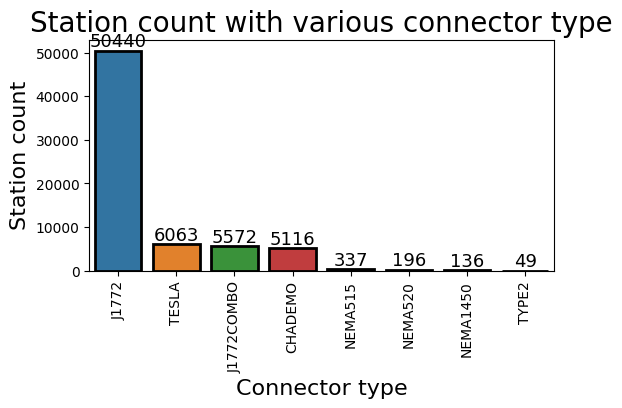

In [ ]:
connector_df=elec_afs_df.groupby(['ev_connector_types'], as_index=False).agg(num_stations=('id','count')).sort_values(by=['num_stations'],ascending=False)

plt.figure(figsize=(6,3))
g=sns.barplot(x="ev_connector_types",y="num_stations",data=connector_df,linestyle = "-", linewidth = 2,edgecolor = "k")
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=13, color='black')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

g.set_title('Station count with various connector type',size=20)
g.set_xlabel('Connector type',size=16)
g.set_ylabel('Station count',size=16)

In [ ]:
# state code
print(basic_afs_df.state.unique())

['AL' 'GA' 'AR' 'MA' 'NY' 'IN' 'WY' 'CT' 'LA' 'NM' 'KS' 'ID' 'TX' 'UT'
 'MN' 'NE' 'CO' 'OR' 'OK' 'PA' 'CA' 'FL' 'SC' 'AZ' 'NV' 'VA' 'MD' 'WA'
 'TN' 'SD' 'IA' 'MO' 'ND' 'WI' 'ME' 'NJ' 'NC' 'MS' 'KY' 'OH' 'MI' 'MT'
 'IL' 'RI' 'AK' 'NH' 'WV' 'HI' 'VT' 'DC' 'DE' 'PR' 'ON' 'QC' 'KA']


In [ ]:
# EV connector type
#https://evcharging.enelx.com/resources/blog/552-ev-charging-connector-types
#https://ev-lectron.com/blogs/blog/the-sae-j1772-ev-charger-guide-everything-you-need-to-know
#https://greentransportation.info/ev-charging/range-confidence/chap8-tech/ev-dc-fast-charging-standards-chademo-ccs-sae-combo-tesla-supercharger-etc.html
print(elec_afs_df.ev_connector_types.value_counts())

J1772         50440
TESLA          6063
J1772COMBO     5572
CHADEMO        5116
NEMA515         337
NEMA520         196
NEMA1450        136
TYPE2            49
Name: ev_connector_types, dtype: int64


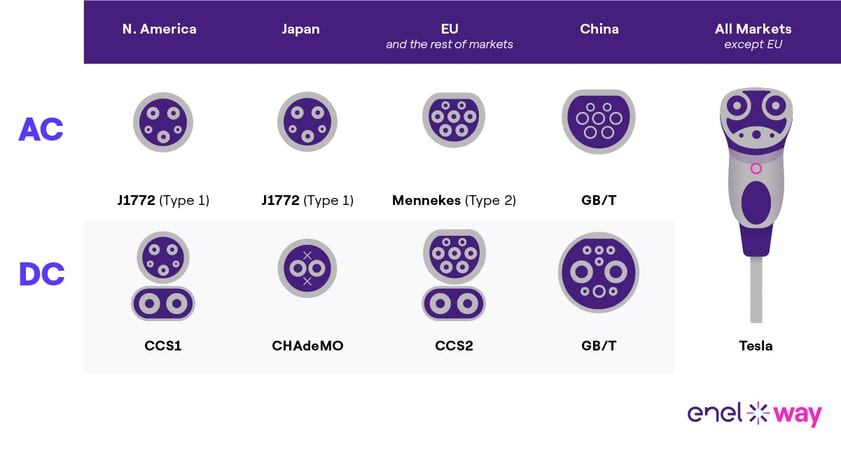

## Renaming column names

In [ ]:
#rename id as sid(i.e. station id)
basic_afs_df.rename(inplace=True, columns={"id": "sid"})
# loc_afs_df.rename(inplace=True, columns={"id": "sid"})
elec_afs_df.rename(inplace=True, columns={"id": "sid"})
e85_afs_df.rename(inplace=True, columns={"id": "sid"})
lpg_afs_df.rename(inplace=True, columns={"id": "sid"})
cng_afs_df.rename(inplace=True, columns={"id": "sid"})
bd_afs_df.rename(inplace=True, columns={"id": "sid"})
rd_afs_df.rename(inplace=True, columns={"id": "sid"})
hy_afs_df.rename(inplace=True, columns={"id": "sid"})
lng_afs_df.rename(inplace=True, columns={"id": "sid"})

In [ ]:
# renaming ev_connector_types
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('J1772COMBO','ccs'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('J1772','type1'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('TYPE2','type2'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('CHADEMO','chademo'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('TESLA','tesla'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('NEMA515','nema515'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('NEMA520','nema520'))
elec_afs_df['ev_connector_types']=elec_afs_df['ev_connector_types'].apply(lambda x : x.replace('NEMA1450','nema1450'))

print(elec_afs_df.ev_connector_types.value_counts())

type1       50440
tesla        6063
ccs          5572
chademo      5116
nema515       337
nema520       196
nema1450      136
type2          49
Name: ev_connector_types, dtype: int64


In [ ]:
# stations port dataset
port_col= ['sid','ev_connector_types']
station_port_df=elec_afs_df[port_col]
station_port_df.rename(inplace=True, columns={"ev_connector_types": "port"})

# drop port column in elec dataset
elec_afs_df=elec_afs_df.drop(columns=['ev_connector_types'])
elec_afs_df.info()
elec_afs_df.drop_duplicates(inplace=True)
elec_afs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67909 entries, 144 to 70338
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sid                 67909 non-null  int64  
 1   ev_dc_fast_num      67909 non-null  float64
 2   ev_level1_evse_num  67909 non-null  float64
 3   ev_level2_evse_num  67909 non-null  float64
 4   ev_network          67904 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59464 entries, 144 to 70338
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sid                 59464 non-null  int64  
 1   ev_dc_fast_num      59464 non-null  float64
 2   ev_level1_evse_num  59464 non-null  float64
 3   ev_level2_evse_num  59464 non-null  float64
 4   ev_network          59459 non-null  object 
dtypes: float64(3), int64(1), ob

<ipython-input-23-048c7d255b62>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
elec_afs_df.ev_network.unique()

array(['Non-Networked', 'Volta', 'EV Connect', 'POWERFLEX',
       'ChargePoint Network', 'OpConnect', 'SHELL_RECHARGE', 'EVGATEWAY',
       nan, 'eVgo Network', 'AMPUP', 'Webasto', 'SemaCharge Network',
       'UNIVERSAL', 'EVCS', 'Blink Network', 'FCN', 'Tesla',
       'Tesla Destination', 'EVRANGE', 'Electrify America', 'CHARGELAB',
       'LIVINGSTON', 'FLO', 'ZEFNET', 'FPLEV', 'RIVIAN_WAYPOINTS',
       'RED_E', 'SWTCH', 'CIRCLE_K', 'WAVE', 'GRAVITI_ENERGY', 'FLASH',
       'RIVIAN_ADVENTURE', 'CHARGEUP'], dtype=object)

# Populate location data and insert data to Database

In [ ]:
!pip install pymysql
import pymysql
import json
from sqlalchemy import create_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
basic_afs_df = basic_afs_df.replace({np.nan: None})

data = basic_afs_df[:].apply(lambda row: 
    (int(row['sid']), 
     row['station_name'],
     row['zip'], 
     row['city'],
     row['state'],
     row['street_address'],
     f'POINT({row["longitude"]} {row["latitude"]})',
     row['access_code'],
     row['access_days_time']
     ), axis=1).tolist()

In [ ]:
insert_data_sql = '''
INSERT INTO stations (sid, station_name ,zip, city ,state ,street_address , location, access_code,access_days_time)
VALUES (%s, %s, %s, %s, %s, %s, ST_SRID(ST_GeomFromText(%s), 4326), %s, %s)
'''

In [ ]:
# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, data)
    con.commit()

## Inserting to database

In [ ]:
elec_afs_df = elec_afs_df.replace({np.nan: None})

elec = elec_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['ev_dc_fast_num'], 
     row['ev_level1_evse_num'],
     row['ev_level2_evse_num'],
     row['ev_network']
     ), axis=1).tolist()

insert_data_sql = '''
INSERT INTO electric_stations (sid, ev_dc_fast_num, ev_level1_evse_num, ev_level2_evse_num ,ev_network)
VALUES (%s, %s, %s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, elec)
    con.commit()

In [ ]:
station_port_df = station_port_df.replace({np.nan: None})

station_port = station_port_df[:].apply(lambda row: 
    (row['sid'], 
     row['port']
     ), axis=1).tolist()

insert_data_sql = '''
INSERT INTO station_ports (sid, port)
VALUES (%s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, station_port)
    con.commit()

In [ ]:
e85_afs_df = e85_afs_df.replace({np.nan: None})


e85 = e85_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['e85_blender_pump'],
     json.dumps(row['e85_other_ethanol_blends'])
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO e85 (sid, e85_blender_pump, e85_other_ethanol_blends)
VALUES (%s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, e85)
    con.commit()

In [ ]:
lpg_afs_df = lpg_afs_df.replace({np.nan: None})


lpg = lpg_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['lpg_primary'],
     json.dumps(row['lpg_nozzle_types'])
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO lpg (sid, lpg_primary, lpg_nozzle_types)
VALUES (%s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, lpg)
    con.commit()

In [ ]:
cng_afs_df = cng_afs_df.replace({np.nan: None})

cng = cng_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['cng_dispenser_num'],
     row['cng_fill_type_code'], 
     row['cng_psi'],
     row['cng_renewable_source'], 
     row['cng_total_compression'],
     row['cng_total_storage'],
     row['cng_vehicle_class'],
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO cng (sid, cng_dispenser_num, cng_fill_type_code, cng_psi, cng_renewable_source, cng_total_compression, cng_total_storage, cng_vehicle_class)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, cng)
    con.commit()

In [ ]:
bd = bd_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['bd_blends']
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO bd (sid, bd_blends)
VALUES (%s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, bd)
    con.commit()

In [ ]:
rd_afs_df = rd_afs_df.replace({np.nan: None})

rd = rd_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['rd_blends'],
     row['rd_blended_with_biodiesel'], 
     row['rd_max_biodiesel_level'],
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO rd (sid, rd_blends, rd_blended_with_biodiesel, rd_max_biodiesel_level)
VALUES (%s, %s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, rd)
    con.commit()

In [ ]:
hy_afs_df = hy_afs_df.replace({np.nan: None})

hy = hy_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['hy_is_retail'],
     json.dumps(row['hy_pressures']), 
     json.dumps(row['hy_standards']),
     row['hy_status_link']
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO hy (sid, hy_is_retail, hy_pressures, hy_standards, hy_status_link)
VALUES (%s, %s, %s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, hy)
    con.commit()

In [ ]:
lng_afs_df = lng_afs_df.replace({np.nan: None})
lng_afs_df = lng_afs_df.replace({'': None})

lng = lng_afs_df[:].apply(lambda row: 
    (row['sid'], 
     row['lng_renewable_source'],
     row['lng_vehicle_class']
     ), axis=1).tolist()

# 
insert_data_sql = '''
INSERT INTO lng (sid, lng_renewable_source, lng_vehicle_class)
VALUES (%s, %s, %s)
'''

# Test insertions in your own database first.
con = pymysql.connect(host='???', port=3306, user='???',passwd='???', db='???')
con
with con:
    cur = con.cursor()
    cur.executemany(insert_data_sql, lng)
    con.commit()

In [ ]:
lng_afs_df.lng_renewable_source.apply(lambda x : len(str(x))).max()
# lng_afs_df

4

# Export CSV and ZIP

In [ ]:
basic_afs_df.to_csv("stations.csv", index=False)
station_port_df.to_csv("station_ports.csv", index=False)
elec_afs_df.to_csv("electric_stations.csv", index=False)
e85_afs_df.to_csv("e85.csv", index=False)
lpg_afs_df.to_csv("lpg.csv", index=False)
cng_afs_df.to_csv("cng.csv", index=False)
bd_afs_df.to_csv("bd.csv", index=False)
rd_afs_df.to_csv("rd.csv", index=False)
hy_afs_df.to_csv("hy.csv", index=False)
lng_afs_df.to_csv("lng.csv", index=False)

In [ ]:
#generate zip file
import os
import zipfile

directory = '/content/'
files =  ['stations.csv',
 'station_ports.csv',
 'electric_stations.csv',
 'e85.csv',
 'lpg.csv',
 'cng.csv',
 'bd.csv',
 'rd.csv',
 'hy.csv',
 'lng.csv']
with zipfile.ZipFile('afs_data_v2.zip', 'w') as zip:
    for file in files:
        file_path = os.path.join(directory, file)
        zip.write(file_path)

In [ ]:
afs_df[afs_df['id']==1517].ev_connector_types

144    ["CHADEMO","J1772","J1772COMBO"]
Name: ev_connector_types, dtype: object